## Observations and Insights 

In [154]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [155]:
# Checking the number of mice.

number_drugs = combined_mouse_study_data['Drug Regimen'].nunique()

total_mice = combined_mouse_study_data['Mouse ID'].nunique()

print(total_mice)

print(number_drugs)

249
10


In [156]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_mouse_study_data.loc[combined_mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [157]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicated_mice = combined_mouse_study_data.loc[combined_mouse_study_data['Mouse ID'] == 'g989']
all_duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [158]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = combined_mouse_study_data.loc[combined_mouse_study_data['Mouse ID'] != 'g989']
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [159]:
# Checking the number of mice in the clean DataFrame.
total_mice_in_clean_dataframe = clean_dataframe['Mouse ID'].nunique()
total_mice_in_clean_dataframe

248

## Summary Statistics

In [160]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_regimen = clean_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_regimen = clean_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_regimen = clean_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_regimen = clean_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM_regimen = clean_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"] .sem()

sumary_stats = pd.DataFrame({"Mean": mean_regimen,"Median": median_regimen,"Variance" : var_regimen, "Standard deviation": std_regimen, "SEM": SEM_regimen})

sumary_stats

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [161]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

clean_dataframe.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median','var','std','sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


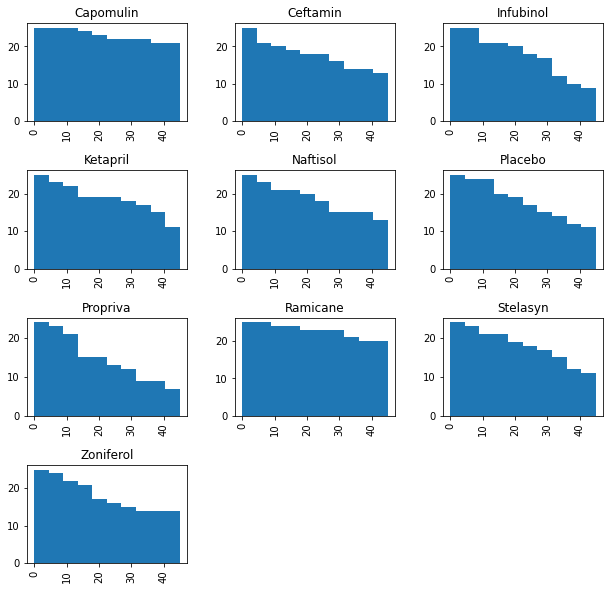

In [162]:
#change figure size
plt.rcParams["figure.figsize"] = (10,10)

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_dataframe['Timepoint'].hist(by=clean_dataframe['Drug Regimen'])
clean_dataframe


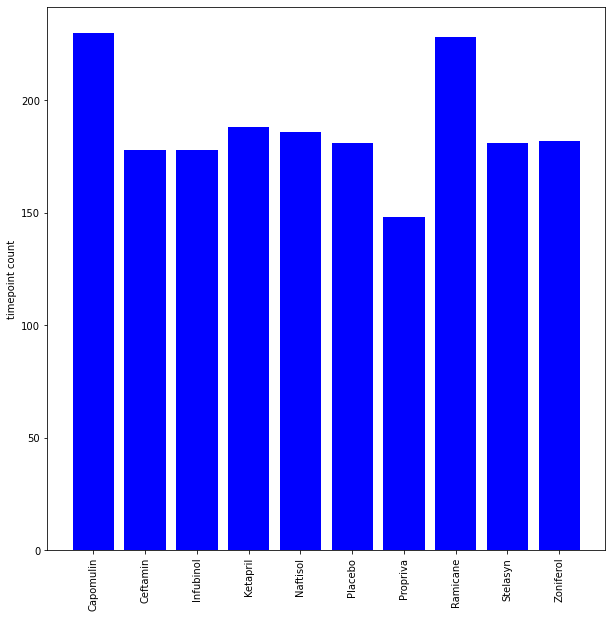

In [163]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


timepoint_count = clean_dataframe.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint_count

plt.bar(timepoint_count.index, timepoint_count, color='b')
plt.xticks(rotation=90)
plt.ylabel('timepoint count')
plt.show()

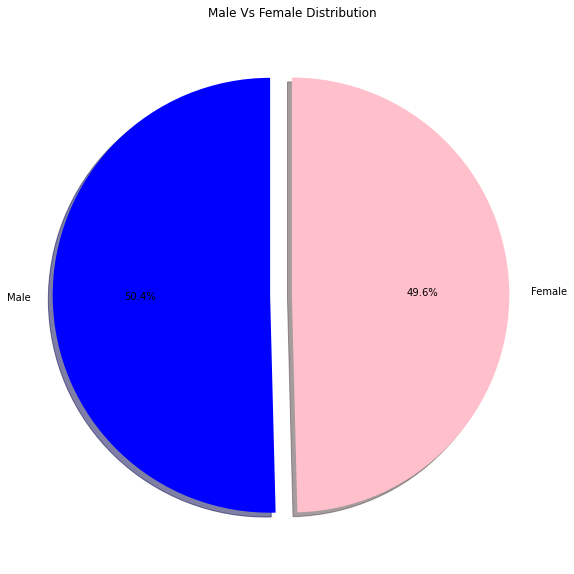

In [164]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_df = clean_dataframe.drop_duplicates(['Mouse ID'])['Sex'].value_counts()
gender_df

labels = ["Male", "Female"]
sizes = [125, 123]
colors = ["blue", "pink"]
explode = (0.1, 0)

pie_plot_df= plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Male Vs Female Distribution");

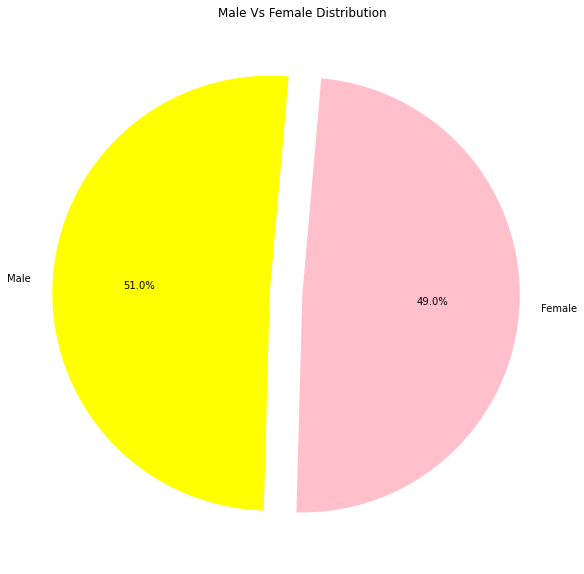

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = clean_dataframe["Sex"].value_counts()
# chart variable
sex = gender.index
gender_count = gender.values
# formating
colors = ["yellow", "pink"]
explode = [0.15, 0]

gender.plot(kind="pie", explode=explode, colors=colors, startangle=85, autopct="%1.1f%%")

plt.title("Male Vs Female Distribution")
plt.ylabel(" ")
plt.show()

## Quartiles, Outliers and Boxplots

In [166]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_dataframe.sort_values(["Drug Regimen","Mouse ID","Timepoint"])
                              
last_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
1719,w575,Zoniferol,Female,16,28,45,68.401286,3
1774,x613,Zoniferol,Female,2,29,0,45.000000,0
1775,x613,Zoniferol,Female,2,29,5,46.097041,0
1776,x613,Zoniferol,Female,2,29,10,46.818176,0


In [167]:


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capmulin_df = clean_dataframe.loc[clean_dataframe['Drug Regimen'] == 'Capomulin']
capmulin_df

capmulin_last = capmulin_df.groupby('Mouse ID').max()['Timepoint']
capmulin_vol = pd.DataFrame(capmulin_last)
capmulin_merge = pd.merge(capmulin_vol, clean_dataframe, on=("Mouse ID", "Timepoint"))
capmulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [168]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [169]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [170]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = capmulin_df.loc[capmulin_df["Mouse ID"] == "b742",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


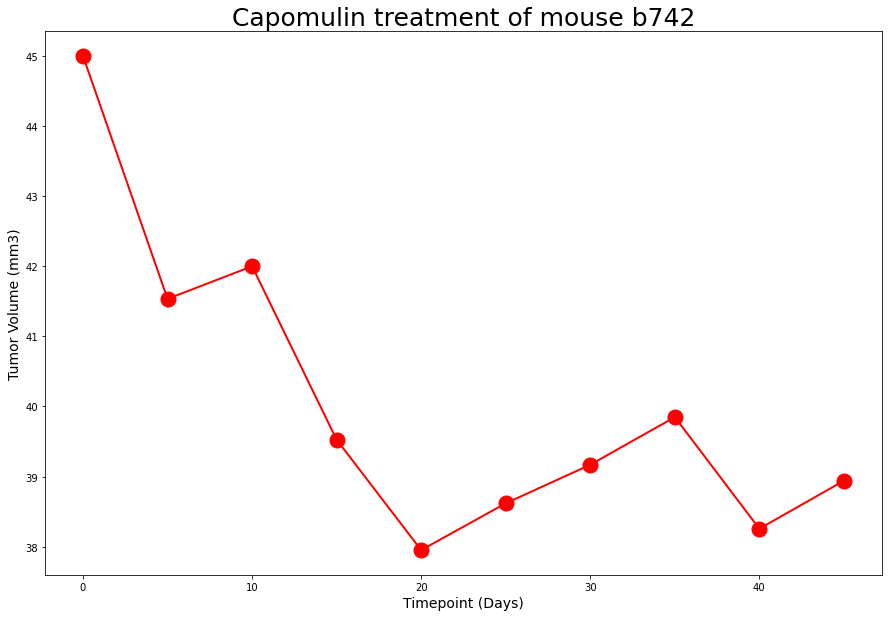

In [171]:
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatment of mouse b742',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="red", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


plt.show()

In [172]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_df = capmulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876


## Correlation and Regression

In [173]:
# Calculate the correlation coefficient and linear regression model 


avg_capmulin = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capmulin = avg_capmulin.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_capmulin.head()

# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(weight_df['Weight (g)'],weight_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")


The correlation between mouse weight and average tumor volume is 0.53


In [174]:
x_values = weight_df['Weight (g)']
y_values = weight_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9609669432428346
intercept:21.489827213299584
rvalue (Correlation coefficient):0.5256995552077166
pandas (Correlation coefficient):0.53
stderr:0.10298279892023657
y = 0.96x + 21.49


The r-squared is: 0.7088568047708717


FileNotFoundError: [Errno 2] No such file or directory: './Images/linear_regression.png'

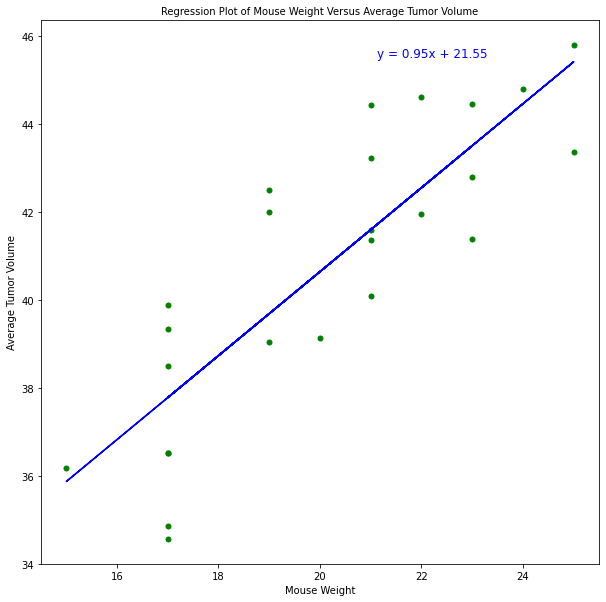

In [153]:
# Add the linear regression equation and line to the scatter plot
x_values = avg_capmulin["Weight (g)"]
y_values = avg_capmulin["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, s=25, color="green")
plt.plot(x_values,regress_values,"b-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',
          fontsize =10)
plt.annotate(line_eq, xy=(20, 40), 
             xycoords='data',xytext=(0.8, 0.95), 
             textcoords='axes fraction',horizontalalignment='right', 
             verticalalignment='top',fontsize=12,color="blue")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("./Images/linear_regression.png", bbox_inches = "tight")
plt.show()